# Dealing with Categorical Variables - Lab

## Introduction

In this lab, you'll explore the Ames Housing dataset and identify numeric and categorical variables. Then you'll transform some categorical data and use it in a multiple regression model.

## Objectives

You will be able to:

* Determine whether variables are categorical or numeric
* Use one-hot encoding to create dummy variables

## Step 1: Load the Ames Housing Dataset

Import `pandas`, and use it to load the file `ames.csv` into a dataframe called `ames`. If you pass in the argument `index_col=0` this will set the "Id" feature as the index.

In [3]:
# Your code here - load the dataset
import pandas as pd

ames = pd.read_csv('ames.csv', index_col=0)

Visually inspect `ames` (it's ok if you can't see all of the columns).

In [4]:
# Your code here
ames.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Go ahead and drop all **columns** with missing data, to simplify the problem. Remember that you can use the `dropna` method ([documentation here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)).

In [5]:
# Your code here - drop columns with missing data
ames.dropna(axis=1, inplace=True)
ames.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000


## Step 2: Identify Numeric and Categorical Variables

The file `data_description.txt`, located in this repository, has a full description of all variables.

Using this file as well as `pandas` techniques, identify the following predictors:

1. A **continuous numeric** predictor
2. A **discrete numeric** predictor
3. A **string categorical** predictor
4. A **discrete categorical** predictor

(Note that `SalePrice` is the target variable and should not be selected as a predictor.)

For each of these predictors, visualize the relationship between the predictor and `SalePrice` using an appropriate plot.

Finding these will take some digging -- don't be discouraged if they're not immediately obvious. The Ames Housing dataset is a lot more complex than the Auto MPG dataset. There is also no single right answer here.

### Continuous Numeric Predictor

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

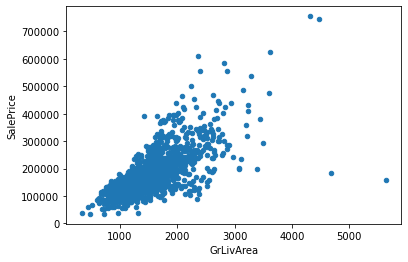

In [6]:
# Your code here - continuous numeric predictor
ames.plot.scatter('GrLivArea', 'SalePrice')

### Discrete Numeric Predictor

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

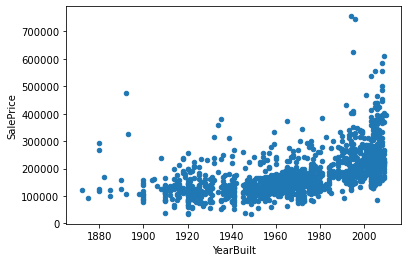

In [7]:
# Your code here - discrete numeric predictor
ames.plot.scatter('YearBuilt', 'SalePrice')

### String Categorical Predictor

<AxesSubplot:xlabel='HouseStyle', ylabel='SalePrice'>

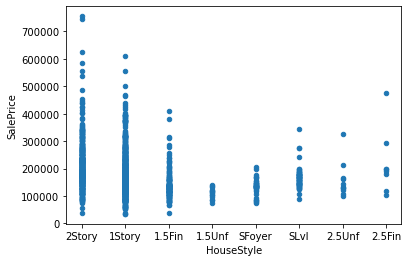

In [8]:
# Your code here - string categorical predictor
ames.plot.scatter('HouseStyle', 'SalePrice')

### Discrete Categorical Predictor

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

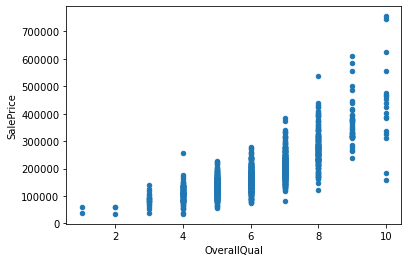

In [9]:
# Your code here - discrete categorical predictor
ames.plot.scatter('OverallQual', 'SalePrice')

## Step 3: Build a Multiple Regression Model with Your Chosen Predictors

Choose the best-looking 3 out of 4 predictors to include in your model.

Make sure that you one-hot encode your categorical predictor(s) (regardless of whether the current data type is a string or number) first.

In [10]:
# Your code here - prepare X and y, including one-hot encoding
y = ames['SalePrice']
X = pd.get_dummies(ames[['GrLivArea', 'HouseStyle', 'OverallQual']], columns=['HouseStyle', 'OverallQual'], drop_first=True)

X.head()

,GrLivArea,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10
Id,,,,,,,,,,,,,,,,,
1,1710,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2,1262,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,1786,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,1717,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
5,2198,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [11]:
# Your answer here - which category or categories were dropped?
# The first option for both categories was dropped, that is, One-floor houses and the minimum possible house Quality (1)

In [12]:
# Your code here - build a regression model and display results
import statsmodels.api as sm

model = sm.OLS(y, sm.add_constant(X))
results = model.fit()

results.summary()

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     307.2
Date:                Mon, 09 Sep 2024   Prob (F-statistic):               0.00
Time:                        18:19:19   Log-Likelihood:                -17427.
No. Observations:                1460   AIC:                         3.489e+04
Df Residuals:                    1442   BIC:                         3.498e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -2.459e+04   2.66e+04     -0.923      0.356   -7.69e+04    2.77e+04
GrLivArea            70.1085      2.847     24.627      0.000      64.524      75.693
HouseStyle_1.5Unf  1.301e+04   1.06e+04      1.232      0.218   -7705.112    3.37e+04
HouseStyle_1Story  3.135e+04   3498.744      8.960      0.000    2.45e+04    3.82e+04
HouseStyle_2.5Fin  -4.43e+04   1.39e+04     -3.194      0.001   -7.15e+04   -1.71e+04
HouseStyle_2.5Unf -4.157e+04   1.17e+04     -3.562      0.000   -6.45e+04   -1.87e+04
HouseStyle_2Story  7557.9579   3647.828      2.072      0.038     402.339    1.47e+04
HouseStyle_SFoyer  3.543e+04   7007.393      5.056      0.000    2.17e+04    4.92e+04
HouseStyle_SLvl    2.651e+04   5583.212      4.748      0.000    1.56e+04    3.75e+04
OverallQual_2      4868.6932   3.39e+04      0.143      0.886   -6.17e+04    7.14e+04
OverallQual_3      1.091e+04   2.76e+04      0.395      0.693   -4.32e+04     6.5e+04
OverallQual_4        3.3e+04   2.65e+04      1.243      0.214   -1.91e+04    8.51e+04
OverallQual_5      4.765e+04   2.64e+04      1.805      0.071   -4146.266    9.94e+04
OverallQual_6      6.629e+04   2.64e+04      2.507      0.012    1.44e+04    1.18e+05
OverallQual_7      9.638e+04   2.65e+04      3.637      0.000    4.44e+04    1.48e+05
OverallQual_8      1.426e+05   2.67e+04      5.352      0.000    9.03e+04    1.95e+05
OverallQual_9      2.229e+05   2.72e+04      8.207      0.000     1.7e+05    2.76e+05
OverallQual_10     2.416e+05   2.84e+04      8.519      0.000    1.86e+05    2.97e+05
==============================================================================
Omnibus:                      650.079   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            44060.843
Skew:                          -1.218   Prob(JB):                         0.00
Kurtosis:                      29.802   Cond. No.                     1.38e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Step 4: Create Partial Regression Plots for Features

For each feature of the regression above (including the dummy features), plot the partial regression.

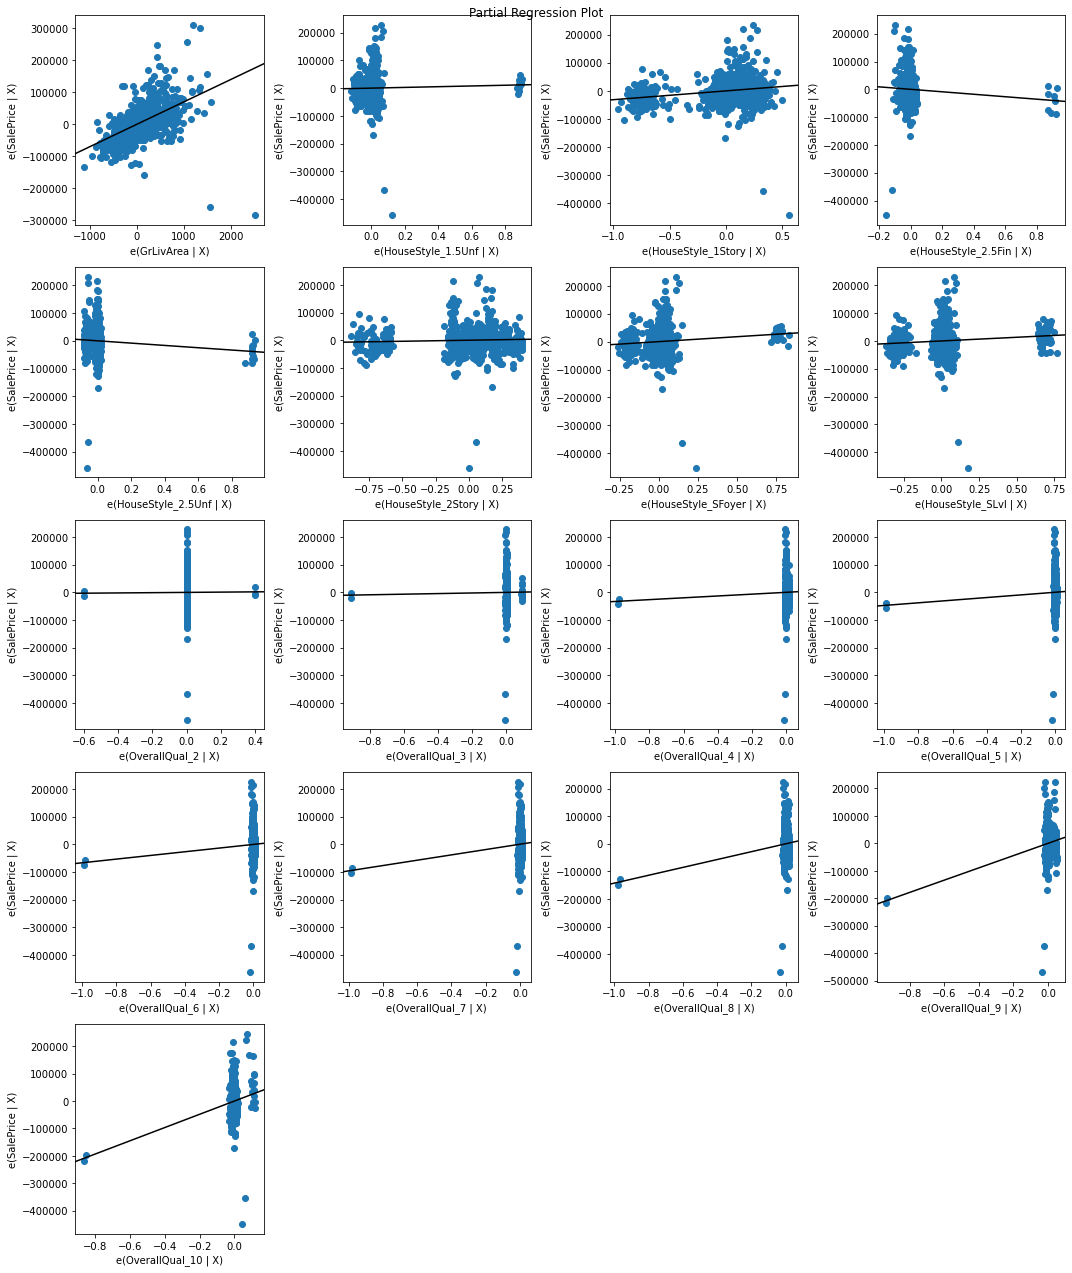

In [13]:
# Your code here - create partial regression plots
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(15,18))

ax = sm.graphics.plot_partregress_grid(
    results,
    exog_idx = list(X.columns),
    fig=fig,
    grid=(5, 4)
)

fig.tight_layout()

## Step 5: Calculate an Error-Based Metric

In addition to the adjusted R-Squared that we can see in the model summary, calculate either MAE or RMSE for this model.

In [14]:
# Your code here - calculate an error-based metric
print(f'R-squared: {results.rsquared}')
print(f'Mean Absolute Error: {abs(results.resid).mean()}')

R-squared: 0.7836435469811076
Mean Absolute Error: 23823.039471520413


## Step 6: Summarize Findings

Between the model results, partial regression plots, and error-based metric, what does this model tell you? What would your next steps be to improve the model?

In [36]:
# Your answer here
# GrLiveArea and some of the House Style categories seem to have the greatest impact in house price out of the analyzed metrics.
# The model is somewhat acurate with an R-squared of 78%, but there is still range for improvement with a MAE o 23k dollars.

# Perhaps removing the Overall Quality variable would be the next step to improve the model since many of its categories aren't
# statistically significant

## Level Up (Optional)

Try transforming X using scikit-learn _and_ fitting a scikit-learn linear regression as well. If there are any differences in the result, investigate them.

In [19]:
# Your code here
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

model = LinearRegression()
model.fit(X, y)

print(f'R-squared: {model.score(X, y)}')
print(f'Mean Absolute Error: {mean_absolute_error(y, model.predict(X))}')

R-squared: 0.7836435469811076
Mean Absolute Error: 23823.03947152035


## Summary

In this lab, you practiced your knowledge of categorical variables on the Ames Housing dataset! Specifically, you practiced distinguishing numeric and categorical data. You then created dummy variables using one hot encoding in order to build a multiple regression model.